# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [9]:
import numpy as np
import pandas as pd


In [10]:
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df= pd.read_csv(data_dir + "titanic.csv")

In [11]:
df.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [12]:
from pandas.io.formats.format import DataFrameRenderer
df["type"] = df["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

In [13]:
# Code here
p = df[df['type']=='passenger']
p

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1,passenger
...,...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0,passenger
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0,passenger
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0,passenger
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1,passenger


In [18]:
joint = pd.crosstab(p["class"], p["embarked"])
joint

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [29]:
# Code here
condGivenClass = pd.crosstab(p['class'],p['embarked'],normalize = 'index')
condGivenClass

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [31]:
condGivenEmb = pd.crosstab(p['class'],p['embarked'],normalize = 'columns')
condGivenEmb

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


69.7% of 3rd class passengers embarked from Southhampton
\
54.05% of Southhampton passengers were 3rd class

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

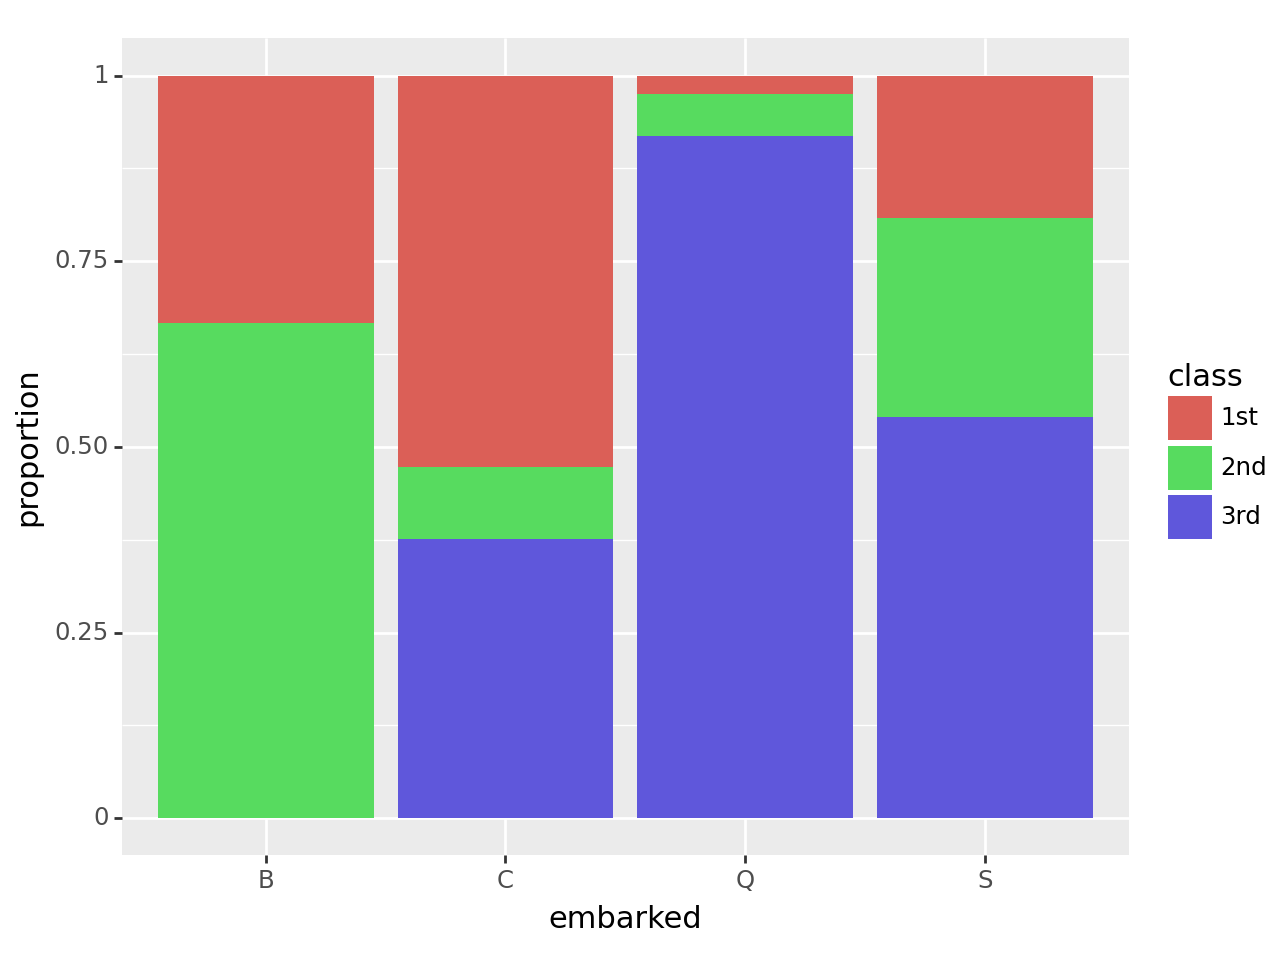

<Figure Size: (640 x 480)>

In [33]:
# Code here

from plotnine import ggplot, geom_bar, aes

#ggplot(condGivenEmb, aes(x="embarked", fill="class")) + geom_bar()

# ... your previous code ...

condGivenEmb = condGivenEmb.reset_index().melt(id_vars='class', value_name='proportion', var_name='embarked')

ggplot(condGivenEmb, aes(x='embarked', y='proportion', fill='class')) + geom_bar(stat='identity', position='stack')


This visualization is far more helpful than the conditional distribution table in terms of getting a general sense of what's happening. You can quickly glance at this graph and understand the proportions of classes that embarked from different locations. The biggest piece of information you lose when calculating conditional distributions is the amounts. How MANY passengers were 1st class? How MANY embarked from location B? This information is lost in the conditional distrbiutiont able and this visualization, so you need the joint distribution table. Also, you lose the proportions of the individual variables. Yes, from this graph you can see that a majority of the passengers that embarked from location Q were 3rd class, but what proportion of the total passengers embarked from Q? Overall, the different calcualtions and graphs can be useful for different reasons.